    fips      unemp                 names
0      1   6.780086                 AZUAY
1      2   5.614014               BOLIVAR
2      3   0.260750                 CAÑAR
3      4  10.891859                CARCHI
4      5   4.163128              COTOPAXI
5      6   2.390809            CHIMBORAZO
6      7   5.801590                EL ORO
7      8   1.027031            ESMERALDAS
8      9   0.121418                GUAYAS
9     10   7.720188              IMBABURA
10    11   6.133316                  LOJA
11    12   6.835166              LOS RIOS
12    13  10.010555                MANABI
13    14   3.071630       MORONA SANTIAGO
14    15  11.126535                  NAPO
15    16  11.223391               PASTAZA
16    17   6.794659            TUNGURAHUA
17    18   8.077624             PICHINCHA
18    19   0.627275      ZAMORA CHINCHIPE
19    20   1.932955             GALAPAGOS
20    21   2.912924             SUCUMBIOS
21    22   2.369433              ORELLANA
22    23   6.876388         SANTO 

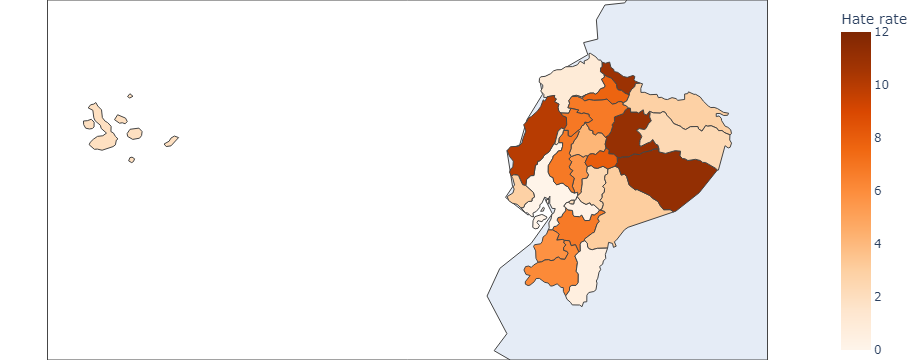

In [3]:
import json
import requests
import pandas as pd
import numpy as np
import plotly.express as px


polygons = requests.get(
    "https://raw.githubusercontent.com/jpmarindiaz/geo-collection/master/ecu/ecuador.geojson").json()

name_cantones  =  []
for i, a in enumerate(polygons['features']):
    name_cantones.append(a['properties']['nombre'])

id_pro = list(range(1, 25, 1))
id_pro.append(90)

df = pd.DataFrame(
    {"fips": id_pro, "unemp": np.random.uniform(0, 12, 25), "names": name_cantones}
)

print(df)
    
fig = px.choropleth(
    df,
    geojson=polygons,
    locations="fips",
    featureidkey="properties.codigo",
    color="unemp",
    color_continuous_scale="Oranges",
    range_color=(0, 12),
    # scope="europe",
    hover_name = "names",
    hover_data = ["names"],
    labels={"unemp": "Hate rate"},
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})



fig.update_geos(fitbounds="locations", visible=True)
fig.show()
